<a href="https://colab.research.google.com/github/Ivan8Garcia/data-science/blob/main/Clasificacion_validacion_y_metricas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color='dark'>**Clasificación: Validación de modelos y métricas de evaluación**</h1>

### Proyecto

Una empresa de financiamiento de automóviles está atravesando una situación complicada, con una alta demanda para una flota reducida de vehículos y un alto número de morosos, lo que está generando grandes pérdidas para la empresa.

Nosotros fuimos contratados para buscar mejoras en la identificación de morosos. El análisis de los clientes actualmente se realiza de forma manual, cliente por cliente, lo que consume mucho tiempo y, aun así, la detección de morosos es muy imprecisa.

Nuestra tarea es utilizar los datos proporcionados por la empresa para **clasificar** a los clientes en cumplidores y morosos.

## <font color='dark'>Clasificando los datos</h1>

### Creando un modelo inicial

In [309]:
import pandas as pd


In [310]:
datos=pd.read_csv("/content/prestacar.csv")

In [311]:
datos

,ingresos_cliente,anualidad_prestamo,años_casa_propia,telefono_trab,evaluacion_ciudad,score_1,score_2,score_3,score_social,cambio_telefono,moroso
0,12600.000000,3569.400000,12.157324,1,2.0,0.057153,0.527227,0.513171,0.117428,2545.000000,0
1,9000.000000,2722.188351,7.000000,0,2.0,0.657661,0.285898,0.614414,0.222700,495.000000,0
2,15750.000000,4477.500000,12.000000,0,2.0,0.501213,0.695423,0.513171,0.117428,1212.000000,0
3,9000.000000,1309.050000,12.157324,0,3.0,0.501213,0.155973,0.513171,0.117428,515.000000,0
4,7650.000000,1125.000000,12.157324,0,2.0,0.294328,0.152076,0.513171,0.117428,162.000000,0
...,...,...,...,...,...,...,...,...,...,...,...
54020,16855.246324,675.000000,12.157324,1,2.0,0.501213,0.180635,0.513171,0.082500,0.000000,1
54021,11250.000000,675.000000,14.000000,0,3.0,0.409620,0.606002,0.513171,0.117428,466.000000,1
54022,13500.000000,900.000000,64.000000,0,2.0,0.162632,0.525412,0.513171,0.117428,962.106056,1
54023,11250.000000,2371.500000,12.157324,0,3.0,0.501213,0.664027,0.513171,0.117428,482.000000,1


In [312]:
X=datos.drop(columns="moroso",axis=1)
y=datos.moroso

In [313]:
from sklearn.tree import DecisionTreeClassifier

modelo=DecisionTreeClassifier()
modelo.fit(X,y)
modelo.score(X,y)


1.0

In [314]:
print(f'La precision del modelo es: {modelo.score(X,y)}')

La precision del modelo es: 1.0


### Validando el modelo

Evaluar el modelo con los mismos datos utilizados en el entrenamiento no es recomendable. Es necesario que la evaluación se realice con datos independientes.  

Evaluar el modelo con los propios datos de entrenamiento sería equivalente a entregar un examen con las preguntas y las respuestas a una persona y, al momento de evaluarla nuevamente, entregarle un examen con las mismas preguntas y opciones. Se espera que esa persona obtenga un buen resultado, ya que ya ha visto las respuestas y ha memorizado el resultado. Esto es diferente de haber aprendido la materia a partir de ese examen y luego presentar una prueba con contenido similar y obtener un resultado positivo.  

Con el objetivo de verificar la capacidad de generalización de un modelo, debemos dividir el conjunto de datos en tres partes: datos de entrenamiento, validación y prueba.  

- El **conjunto de entrenamiento** se utiliza para entrenar los modelos. A partir de este conjunto, los modelos identifican patrones en los datos.  

- El **conjunto de validación** se emplea para evaluar el desempeño de diferentes modelos con datos nuevos que no fueron utilizados en el entrenamiento.  

- El **conjunto de prueba** se mantiene separado desde el inicio para simular datos del mundo real. No se utiliza en ninguna etapa del entrenamiento ni de la validación, sirviendo como una estimación de la capacidad del modelo elegido para generalizar y predecir nuevos datos.

<a href="https://ibb.co/9H2Z1HZ5"><img src="https://i.ibb.co/0yZs6ysb/datos-train-test.png" alt="datos-train-test" border="0"></a>

In [315]:
from sklearn.model_selection import train_test_split

In [316]:
X,X_test,y,y_test=train_test_split(X,y,test_size=0.15,stratify=y ,random_state=5)
X_train,X_val,y_train,y_val=train_test_split(X,y,stratify=y ,random_state=5)

In [317]:
#en esta celda vemos que la exactitud del entrenamiento es de 100 porque solamente lo memorizó
#y al momento de validar el modelo no fue lo suficientemente bueno porque no se incluyó "max_depth"
modelo=DecisionTreeClassifier()
modelo.fit(X_train,y_train)
print(f'La exactitud del modelo con el conjunto de entrenamiento es de: {modelo.score(X_train,y_train)}')
print(f'La exactitud del modelo con el conjunto de validacion es de: {modelo.score(X_val,y_val)}')

La exactitud del modelo con el conjunto de entrenamiento es de: 1.0
La exactitud del modelo con el conjunto de validacion es de: 0.8467903492727115


In [318]:
#la mejor practica es colocando una profundidad maxima
#como resultado obtenemos algo mas eficaz que la celda anterior
modelo=DecisionTreeClassifier(max_depth=10)
modelo.fit(X_train,y_train)
print(f'La exactitud del modelo con el conjunto de entrenamiento es de: {modelo.score(X_train,y_train)}')
print(f'La exactitud del modelo con el conjunto de validacion es de: {modelo.score(X_val,y_val)}')

La exactitud del modelo con el conjunto de entrenamiento es de: 0.9205865272938444
La exactitud del modelo con el conjunto de validacion es de: 0.9059315390645414


### Evaluando el modelo

In [319]:
from sklearn.metrics import confusion_matrix

In [320]:
y_previsto= modelo.predict(X_val)
matriz_confusion=confusion_matrix(y_val,y_previsto)
print(matriz_confusion)

[[10359   120]
 [  960    42]]


In [321]:
from sklearn.metrics import ConfusionMatrixDisplay

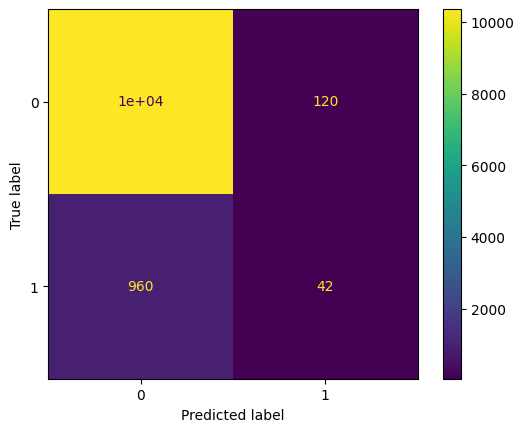

In [322]:
visualizacion= ConfusionMatrixDisplay(confusion_matrix=matriz_confusion)
visualizacion.plot();

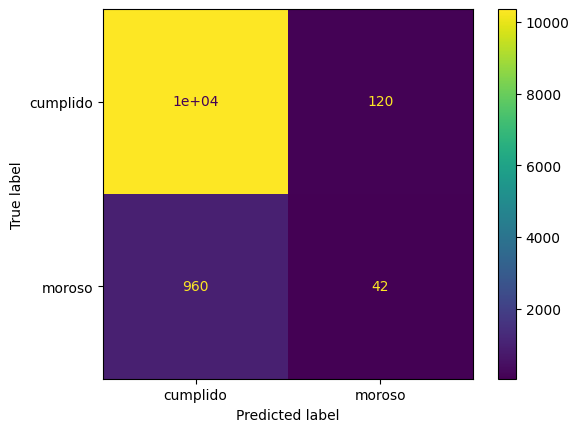

In [323]:
#como se lee esta matriz, en el cuadrante inferior izquierdo nos dice que tenemos 961 clientes cumplidores(eje x) pero
#no lo son en realidad no son cumplidos si no que son morosos(eje Y) en realidad. y predijo 41 morosos que si son morosos.
#(cuadrante derecho inferior).
# de igual manera acertó que 8828 seran cumplidores(cuadrante izq superior),cuando en realidad si son cumplidores(en el dataset).
#y por ultimo predijo que 78 morosos son cumplidores(no son cumplidores,cuadrante der.superior).
visualizacion= ConfusionMatrixDisplay(confusion_matrix=matriz_confusion,display_labels=["cumplido","moroso"])
visualizacion.plot();

## <font color='dark'>Métricas de evaluación</h1>

### Exactitud, precisión y recall (sensibilidad).

<a href="https://ibb.co/351SbY7t"><img src="https://i.ibb.co/wZypqrRD/matriz-confusion.png" alt="matriz-confusion" border="0"></a>

<a href="https://imgbb.com/"><img src="https://i.ibb.co/6Jp6rKyC/Captura-de-tela-2025-03-22-120744.png" alt="Captura-de-tela-2025-03-22-120744" border="0"></a>

In [324]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

In [325]:
45/(45+123)  #precision

0.26785714285714285

In [326]:
print(f'La precisión del modelo es de: {precision_score(y_val,y_previsto)}')
print(f'La exactitud (accuracy) del modelo es de: {accuracy_score(y_val,y_previsto)}')
print(f'La sensibilidad (recall) del modelo es de: {recall_score(y_val,y_previsto)}')
print(f'El f1 score del modelo es de: {f1_score(y_val,y_previsto)}')

La precisión del modelo es de: 0.25925925925925924
La exactitud (accuracy) del modelo es de: 0.9059315390645414
La sensibilidad (recall) del modelo es de: 0.041916167664670656
El f1 score del modelo es de: 0.07216494845360824


### Curva ROC

In [327]:
from IPython.display import Image
Image(url='https://raw.githubusercontent.com/dariyasydykova/open_projects/master/ROC_animation/animations/cutoff.gif')

Fuente: [paulvanderlaken.com](https://paulvanderlaken.com/2019/08/16/roc-auc-precision-and-recall-visually-explained/)




In [328]:
from sklearn.metrics import RocCurveDisplay

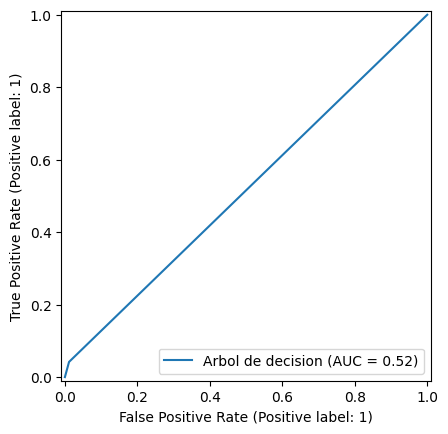

In [329]:
RocCurveDisplay.from_predictions(y_val,y_previsto,name="Arbol de decision");

In [330]:
from sklearn.metrics import roc_auc_score

In [331]:
print(f'El area bajo la curva ROC es:{roc_auc_score(y_val,y_previsto)}')

El area bajo la curva ROC es:0.5152323466436723


### Curva de  precisión x sensibilidad

In [332]:
Image(url='https://paulvanderlaken.com/wp-content/uploads/2019/08/roc.gif')

Fuente: [paulvanderlaken.com](https://paulvanderlaken.com/2019/08/16/roc-auc-precision-and-recall-visually-explained/)


In [333]:
from sklearn.metrics import PrecisionRecallDisplay

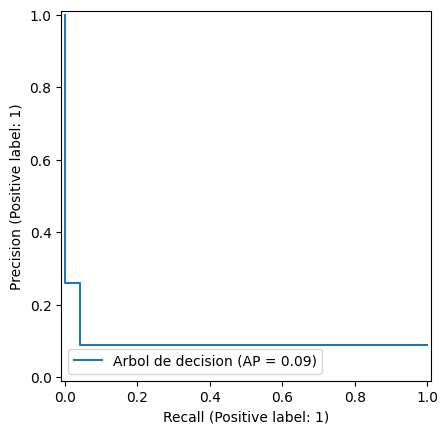

In [334]:
PrecisionRecallDisplay.from_predictions(y_val,y_previsto,name="Arbol de decision");

In [335]:
from sklearn.metrics import average_precision_score

In [336]:
print(f"El score promedio de Precision vs Recall es de:{average_precision_score(y_val,y_previsto)}")

El score promedio de Precision vs Recall es de:0.09448356430013705


### Informe de métricas

In [337]:
from sklearn.metrics import classification_report

In [338]:
print(classification_report(y_val,y_previsto))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     10479
           1       0.26      0.04      0.07      1002

    accuracy                           0.91     11481
   macro avg       0.59      0.52      0.51     11481
weighted avg       0.86      0.91      0.87     11481



## <font color='dark'> Validación cruzada</h1>

### Usando KFold

La validación del modelo de clasificación a partir de la separación de los datos en conjuntos de entrenamiento y validación hace que el resultado dependa en gran medida de esta división. Puede suceder que, de forma aleatoria, el patrón de los datos de validación sea diferente al de los datos de entrenamiento, lo que podría llevar a obtener un resultado mucho mejor o mucho peor que la realidad simplemente por suerte o mala suerte.  

Teniendo esto en cuenta, es posible utilizar la **validación cruzada**, una estrategia más consistente y ampliamente utilizada en proyectos de *machine learning*.  

En la validación cruzada, en lugar de separar los datos en entrenamiento y validación una sola vez, se dividen en varias partes de igual tamaño. En cada una de estas divisiones, se usa una parte para validación y todas las demás para entrenamiento. Este proceso se repite hasta que todas las partes hayan sido utilizadas tanto para validación como para entrenamiento.  

Se generará un modelo para cada una de estas divisiones y la evaluación del desempeño se realizará promediando la métrica de cada modelo. Esto elimina la dependencia de la separación de los datos, ya que hay una mayor variación en la selección de los mismos y se obtiene un valor medio.  

Generalmente, se utilizan 5 o 10 partes. Un número mayor no suele ser necesario, ya que implica un procesamiento más costoso, y valores menores ya ayudan a mitigar el problema de la selección de los datos.

<a href="https://ibb.co/KcBtshJR"><img src="https://i.ibb.co/nq4X1mFZ/train-y-validacion.png" alt="train-y-validacion" border="0"></a>

In [339]:
from sklearn.model_selection import KFold, cross_validate


In [340]:
modelo=DecisionTreeClassifier(max_depth=10)
kf=KFold(n_splits=5,shuffle=True,random_state=5)
cv_resultados=cross_validate(modelo,X,y,cv=kf)
cv_resultados

{'fit_time': array([0.25064659, 0.23994541, 0.24884892, 0.26425076, 0.27162671]),
 'score_time': array([0.00364184, 0.00350857, 0.00800443, 0.00383258, 0.00550842]),
 'test_score': array([0.91333696, 0.90820993, 0.90755662, 0.91321864, 0.89949913])}

In [341]:
cv_resultados["test_score"]

array([0.91333696, 0.90820993, 0.90755662, 0.91321864, 0.89949913])

In [342]:
promedio=cv_resultados["test_score"].mean()
desvio_estandar=cv_resultados["test_score"].std()
print(f'El promedio de la exactitud es de: {promedio}')
print(f'El desvio estandar es de: {desvio_estandar}')
print(f'El intervalo de confianza es:[{promedio- 2 *desvio_estandar},{min(promedio + 2*desvio_estandar,1)}]')

El promedio de la exactitud es de: 0.90836425659925
El desvio estandar es de: 0.005050929306691041
El intervalo de confianza es:[0.8982623979858679,0.9184661152126321]


### Validación cruzada con sensibilidad

In [343]:
def intervalo_confianza(resultados):
  promedio=resultados["test_score"].mean()
  desvio_estandar=resultados["test_score"].std()
  return f'El intervalo de confianza es:[{promedio- 2 *desvio_estandar},{min(promedio + 2*desvio_estandar,1)}]'

In [344]:
modelo=DecisionTreeClassifier(max_depth=10)
kf=KFold(n_splits=5,shuffle=True,random_state=5)
cv_resultados=cross_validate(modelo,X,y,cv=kf,scoring="recall")
cv_resultados

{'fit_time': array([0.25996065, 0.2627461 , 0.27517366, 0.2429769 , 0.24281263]),
 'score_time': array([0.00691032, 0.00865722, 0.00646639, 0.00635791, 0.00598788]),
 'test_score': array([0.02509908, 0.01732673, 0.0196802 , 0.01305483, 0.02543353])}

In [345]:
intervalo_confianza(cv_resultados)

'El intervalo de confianza es:[0.010698165853737717,0.02953957857475356]'

#**DESAFIO, generar el intervalo de confianza para cada una de las métricas utilizando la validación cruzada:**

Es siempre importante analizar el problema de negocio antes de evaluar un modelo de clasificación, para que se elija la métrica más adecuada. En nuestro proyecto, estamos clasificando clientes morosos de una agencia de alquiler de vehículos e identificamos que la métrica más relevante es el recall, que busca minimizar la cantidad de personas morosas que son clasificadas como cumplidoras.

Para obtener un resultado completo de las métricas en la validación cruzada así como el classification_report, es necesario utilizar el método cross_validate e informar en el parámetro scoring las métricas a evaluar.

Como desafío, construye un código para generar el intervalo de confianza para cada una de las métricas utilizando la validación cruzada:

Exactitud
Recall
Precisión
F1-score

Para solucionar el desafío, podemos explorar la documentación y darnos cuenta de que podemos utilizar una lista de métricas en el parámetro scoring. De esta manera, vamos a utilizar el código de la clase para validar el modelo con KFold, pero usando todas las métricas de evaluación de una sola vez:

In [346]:
#modelo = DecisionTreeClassifier(max_depth = 10)
#kf = KFold(n_splits=5, shuffle = True, random_state = 5)
#cv_resultados = cross_validate(modelo, X, y, cv=kf, scoring = ['accuracy','recall', 'precision', 'f1'])
#cv_resultados

El resultado obtenido es un diccionario con los tiempos de ajuste de los modelos, tiempos de cálculo de las métricas y los resultados de cada una de las métricas para cada uno de los 5 modelos del KFold:

Para generar el intervalo de confianza para las métricas, podemos calcular la media y la desviación estándar de cada métrica y utilizar la función print() para presentar el resultado en pantalla. De este modo, podemos construir una función para crear este informe, usando un for para recorrer cada una de las claves del diccionario que acceden a las métricas:

In [347]:
#def informe_metricas(resultados):
#    for metrica in ['test_accuracy', 'test_recall', 'test_precision', 'test_f1']:
#        media = resultados[metrica].mean()
#        desvio_estandar = resultados[metrica].std()
#        print(f'Intervalo de confianza({metrica}): [{media-2*desvio_estandar}, {min(media+2*desvio_estandar, 1.0)}]')

Por último, solo hay que ejecutar la función, utilizando cv_resultados como parámetro:

In [348]:
#informe_metricas(cv_resultados)

### Estratificando los datos

In [349]:
# 0=cumplidos 1=morosos
datos.moroso.value_counts()

,count
moroso,
0,49309
1,4716


In [350]:
#visualizamos estos datos en porcentaje para darnos cuenta que está desbalanceado
datos.moroso.value_counts(normalize=True)

,proportion
moroso,
0,0.912707
1,0.087293


In [351]:
from sklearn.model_selection import StratifiedKFold

In [352]:
modelo=DecisionTreeClassifier(max_depth=10)
skf=StratifiedKFold(n_splits=5,shuffle=True,random_state=5)
cv_resultados=cross_validate(modelo,X,y,cv=skf,scoring="recall")


In [353]:
intervalo_confianza(cv_resultados)

'El intervalo de confianza es:[0.02068703817841383,0.03718139934201731]'

## <font color='dark'>Balanceo de los datos</h1>

### Oversampling

https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html#id1

In [354]:
from imblearn.over_sampling import SMOTE

In [355]:
over_sampling= SMOTE()
x_balanceada,y_balanceada=over_sampling.fit_resample(X,y)

In [356]:
#en esta celda ya nos damos cuenta que hemos balanceado
y_balanceada.value_counts(normalize=True)

,proportion
moroso,
0,0.5
1,0.5


In [357]:
#aqui podemos ver que hemos creado en 1 mas de 41000 datos sinteticos para emular el balance
y_balanceada.value_counts()

,count
moroso,
0,41912
1,41912


In [358]:
modelo=DecisionTreeClassifier(max_depth=10)
skf=StratifiedKFold(n_splits=5,shuffle=True,random_state=5)
cv_resultados=cross_validate(modelo,x_balanceada,y_balanceada,cv=skf,scoring="recall")

In [359]:
intervalo_confianza(cv_resultados)

'El intervalo de confianza es:[0.7067284417629539,0.7630652940853487]'

### Pipeline para validación

In [360]:
from imblearn.pipeline import Pipeline as imbpipeline

In [361]:
modelo= DecisionTreeClassifier(max_depth=10)
pipeline=imbpipeline([("oversample",SMOTE()),("arbol",modelo)])

In [362]:
skf=StratifiedKFold(n_splits=5,shuffle=True,random_state=5)
cv_resultados=cross_validate(pipeline,X,y,cv=skf,scoring="recall")

In [363]:
intervalo_confianza(cv_resultados)

'El intervalo de confianza es:[0.2144294252055619,0.30492014095394565]'

### Undersampling

https://imbalanced-learn.org/stable/references/generated/imblearn.under_sampling.NearMiss.html

In [364]:
from imblearn.under_sampling import NearMiss

In [365]:
modelo= DecisionTreeClassifier(max_depth=10)
pipeline=imbpipeline([("undersample",NearMiss(version=3)),("arbol",modelo)])
skf=StratifiedKFold(n_splits=5,shuffle=True,random_state=5)
cv_resultados=cross_validate(pipeline,X,y,cv=skf,scoring="recall")

In [366]:
intervalo_confianza(cv_resultados)

'El intervalo de confianza es:[0.6227820387908162,0.7032163236053158]'

### Probando el modelo

In [367]:
#ahora si vamos a probar el modelo en unos cuantos pasos usando el mejor metodo que encontramos ("undersample)"
undersample=NearMiss(version=3)
x_balanceada,y_balanceada=undersample.fit_resample(X,y)
modelo=DecisionTreeClassifier(max_depth=10)
modelo.fit(x_balanceada,y_balanceada)


DecisionTreeClassifier(max_depth=10)

              precision    recall  f1-score   support

           0       0.94      0.48      0.64      7397
           1       0.11      0.70      0.20       707

    accuracy                           0.50      8104
   macro avg       0.53      0.59      0.42      8104
weighted avg       0.87      0.50      0.60      8104



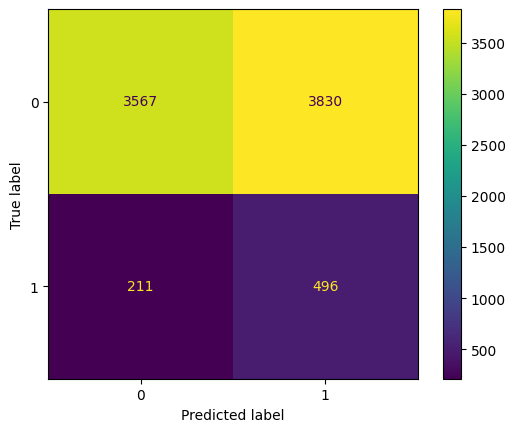

In [368]:
#ahora es el momento de usar X_test(datos que nuestro modelo nunca vió)para ver como se desempeña el modelo
y_previsto=modelo.predict(X_test)

print(classification_report(y_test,y_previsto))
ConfusionMatrixDisplay.from_predictions(y_test,y_previsto);

## **Desafío: otros métodos de balanceo**

Durante la clase, exploramos dos estrategias de balanceo de datos: oversampling y undersampling. En cada una de ellas utilizamos un algoritmo diferente, el SMOTE para generar nuevos datos sintéticos y el NearMiss para mantener datos que tienen un patrón cercano entre las clases.

Estos no son los únicos algoritmos existentes y el oversampling y undersampling no necesitan ser utilizados de manera aislada. Es posible combinar las dos estrategias en una sola para equilibrar los puntos negativos de cada una de ellas. Esto no quiere decir que esta estrategia sea más efectiva en todas las ocasiones, pero es una opción que puede ser explorada en los proyectos.

Como desafío, utiliza el algoritmo SMOTEENN, que combina el oversampling con SMOTE y el undersampling con el ENN (Edited Nearest Neighbours), para balancear los datos y observa los resultados obtenidos por el modelo usando el pipeline y la validación cruzada.

Como primer paso, vamos a importar el método SMOTEENN desde la sección combine de la biblioteca imblearn:

In [369]:
from imblearn.combine import SMOTEENN

Los pasos para utilizar el método con la validación cruzada son los mismos. Debemos instanciar el modelo y crear un pipeline con los pasos de balanceo de los datos y ajuste del modelo:

In [370]:
modelo = DecisionTreeClassifier(max_depth = 10)
pipeline = imbpipeline([('smoteenn', SMOTEENN()), ('arbol', modelo)])

Después de eso, podemos utilizar la validación cruzada con el StratifiedKFold para mantener la proporción en los datos y utilizar el método cross_validate con el pipeline, evaluando el rendimiento con la métrica recall y generando el intervalo de confianza de esa métrica:

In [371]:
skf = StratifiedKFold(n_splits=5, shuffle = True, random_state = 5)
cv_resultados = cross_validate(pipeline,X, y, cv=skf, scoring = 'recall')
intervalo_confianza(cv_resultados)

'El intervalo de confianza es:[0.274994936590849,0.42692442231525646]'

El recall de este modelo estuvo alrededor de 0.32 a 0.40, un poco mejor que el resultado usando solamente el oversampling, pero peor que el resultado del undersampling. Por lo tanto, esta estrategia no fue tan eficiente para este caso, pero eso no significa que no pueda ser utilizada en otros proyectos.

#**Desafio Randomforest**

El primer paso es identificar cómo importar el algoritmo Random Forest a partir de la documentación, que siempre trae ejemplos de cómo utilizar la función. La importación se puede hacer con el siguiente código:

In [372]:
from sklearn.ensemble import RandomForestClassifier

Ahora que hemos importado el algoritmo, solo necesitamos instanciar el RandomForestClassifier en una variable y utilizar el parámetro max_depth = 10 así como hicimos con el árbol de decisión. Esto evitará que el modelo se ajuste demasiado a los datos de entrenamiento. Después de eso, podemos ajustar el modelo con datos de entrenamiento y verificar el resultado de la precisión:

In [373]:
modelo = RandomForestClassifier(max_depth = 10)
modelo.fit(X_train, y_train)
print(f'Precisión de entrenamiento: {modelo.score(X_train, y_train)}')
print(f'Precisión de validación: {modelo.score(X_val, y_val)}')

Precisión de entrenamiento: 0.9152729384436702
Precisión de validación: 0.9128995732079087


Al ejecutar el código, obtendremos el siguiente resultado:

Precisión de entrenamiento: 0.9154761904761904

Precisión de validación: 0.9127253723543245

Este resultado muestra que el RandomForest tuvo una precisión mejor que el árbol de decisión, indicando que el modelo tiene una tasa de aciertos general mejor.

Para completar, podemos generar una matriz de confusión a partir del modelo y verificar la cantidad de aciertos y errores para cada clase. Podemos crear la matriz con el siguiente código:

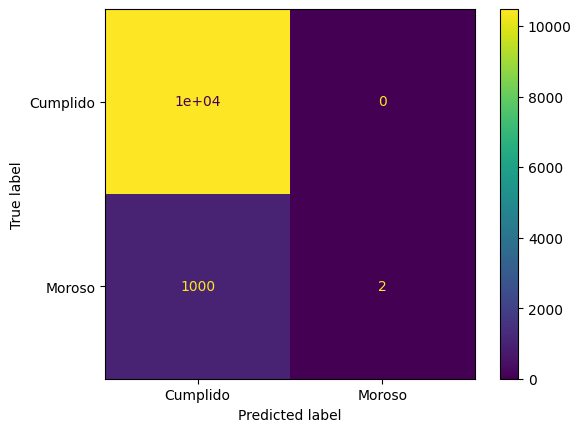

In [374]:
y_previsto = modelo.predict(X_val)
matriz_confusion = confusion_matrix(y_val, y_previsto)
visualizacion = ConfusionMatrixDisplay(confusion_matrix= matriz_confusion,
                                      display_labels = ['Cumplido', 'Moroso'])
visualizacion.plot();

A partir de esta matriz, nos damos cuenta de que a pesar de una precisión mayor, el modelo RandomForest no logra identificar casi ningún cliente moroso, indicando un resultado bastante malo en relación al modelo de árbol de decisión.

#**Desafio Diabetes**

**1 -** Para la construcción de un modelo de machine learning se necesitan datos. Como tarea inicial, realiza la lectura de la base de datos de diabetes y divide los datos en variables explicativas y variable objetivo (x e y). La variable objetivo es la columna que quieres clasificar, que contiene la información de si el paciente tiene o no diabetes. Las variables explicativas son todas las columnas excepto la de diabetes. La separación de los datos se puede hacer con la selección de columnas con pandas.

**2 -** Una etapa muy importante en proyectos de clasificación es la validación de los modelos, para identificar si hay una generalización del modelo para datos nuevos. Realiza la división de los datos entre entrenamiento, validación y prueba. Utiliza el 5% de los datos para prueba y con el resto, deja el 25% para validación. En el momento de la separación, usa el parámetro stratify a partir de la variable objetivo para mantener la proporción de los datos.

**3 -** La etapa de modelado de datos consiste en utilizar un algoritmo capaz de identificar patrones en los datos y clasificar los valores. A partir del modelo es posible extraer una tasa de acierto para entender su desempeño. Crea 2 modelos utilizando los algoritmos DecisionTreeClassifier y RandomForestClassifier y evalúa la precisión de entrenamiento y prueba, eligiendo el valor 3 para el parámetro max_depth del algoritmo DecisionTreeClassifier y el valor 2 para el max_depth del algoritmo RandomForestClassifier, para que los modelos no se especialicen demasiado en el patrón de los datos de entrenamiento.

**4 -** La tasa de acierto generalmente no proporciona información suficiente para entender el comportamiento del modelo. La matriz de confusión es una herramienta más completa, capaz de proporcionar los aciertos y errores del modelo para cada clase. Construye una matriz de confusión para cada uno de los modelos para evaluar el desempeño de la predicción. Para construir la matriz, usa el método predict para generar las predicciones de los valores y comparar con los valores reales de la base de datos.



In [375]:
import pandas as pd


In [376]:
datos=pd.read_csv("/content/diabetes.csv")
datos

,glicemia,presion_sanguinea,grasa_subcutanea_triceps,insulina,imc,diabetes
0,66,23,94,28.1,0.167,0
1,40,35,168,43.1,2.288,1
2,50,32,88,31.0,0.248,1
3,70,45,543,30.5,0.158,1
4,60,23,846,30.1,0.398,1
...,...,...,...,...,...,...
389,88,44,510,43.3,0.222,1
390,88,39,110,36.5,1.057,1
391,58,26,16,28.4,0.766,0
392,76,48,180,32.9,0.171,0


La base de datos tiene solo 394 filas y 6 columnas. Podemos observar 6 columnas de datos: glicemia, presion_sanguinea, pliegue_cutaneo_triceps, insulina, imc y diabetes. La clasificación del modelo debe hacerse para la columna de diabetes, que presenta valores de 0 para ausencia de diabetes y 1 para presencia de diabetes, por lo tanto, esta es la variable objetivo y el resto son variables explicativas. Podemos realizar la división de los datos usando el código:

In [377]:
X=datos.drop("diabetes",axis=1)
y=datos.diabetes

**2 -** Para realizar la división de datos entre entrenamiento, validación y prueba, podemos usar el método **train_test_split** de la biblioteca Scikit-Learn. Primero debemos importar la función con el código:

In [378]:
from sklearn.model_selection import train_test_split

La primera división se hará de los datos de prueba y luego con el resto se hará una nueva división entre entrenamiento y validación, usando el parámetro stratify = y para mantener la proporción de los datos de la variable objetivo entre los conjuntos. Dado que la base de datos tiene pocos registros, solo se dividirá el 5% de los datos para prueba para que haya una cantidad mayor de registros en la base de datos de entrenamiento:

In [379]:
X, X_test, y, y_test = train_test_split(X, y, stratify = y, test_size = 0.05, random_state = 5)
X_train, X_val, y_train, y_val = train_test_split(X, y, stratify = y, random_state = 5)

**3 -** La primera etapa para la creación de los modelos será la importación de los algoritmos DecisionTreeClassifier y RandomForestClassifier, usando el código:

In [380]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

Después de la importación de los algoritmos, podemos instanciar los modelos y almacenarlos en variables, aquí se eligieron los valores de max_depth = 3 para el DecisionTree y max_depth = 2 para el RandomForest:

In [381]:
arbol = DecisionTreeClassifier(max_depth = 3)
random_forest = RandomForestClassifier(max_depth = 2)

Para hacer el ajuste de los modelos podemos usar el método fit() y para evaluar la tasa de acierto, el método score():

In [382]:
arbol.fit(X_train, y_train)
print(f'Precisión de entrenamiento: {arbol.score(X_train, y_train)}')
print(f'Precisión de prueba: {arbol.score(X_val, y_val)}')

Precisión de entrenamiento: 0.7571428571428571
Precisión de prueba: 0.776595744680851


In [383]:
random_forest.fit(X_train, y_train)
print(f'Precisión de entrenamiento: {random_forest.score(X_train, y_train)}')
print(f'Precisión de prueba: {random_forest.score(X_val, y_val)}')

Precisión de entrenamiento: 0.7392857142857143
Precisión de prueba: 0.6914893617021277


4 - Para generar la matriz de confusión, primero es necesario importar la función ConfusionMatrixDisplay, usando el código:

In [384]:
from sklearn.metrics import ConfusionMatrixDisplay

Hecho esto, basta con utilizar el método predict() para hacer la predicción de datos con los modelos y luego utilizar los valores reales y previstos en el método from_predictions() de la matriz de confusión:

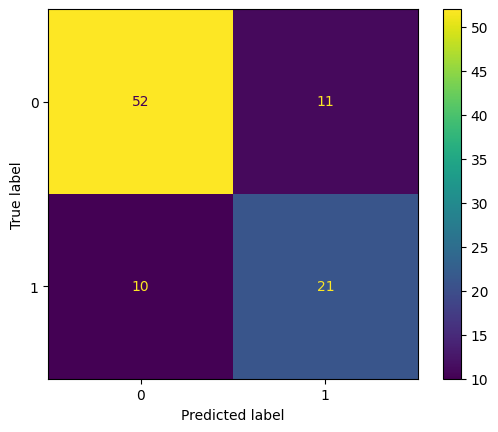

In [385]:
prediccion_arbol = arbol.predict(X_val)
ConfusionMatrixDisplay.from_predictions(y_val, prediccion_arbol);

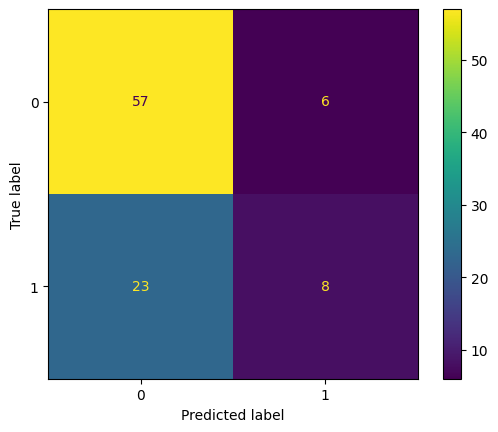

In [386]:
prediccion_rf = random_forest.predict(X_val)
ConfusionMatrixDisplay.from_predictions(y_val, prediccion_rf);

1 - Para extraer las métricas de un modelo, primero importaremos las funciones que calculan automáticamente:

**accuracy_score**

**recall_score**

**precision_score**

**f1_score**

In [387]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

Ahora vamos a calcular cada una de las métricas para los dos modelos, utilizando los datos reales y los valores previstos:

In [388]:
prediccion_arbol = arbol.predict(X_val)

print(f'Precisión (Decision Tree): {accuracy_score(y_val, prediccion_arbol)}')
print(f'Recall (Decision Tree): {recall_score(y_val, prediccion_arbol)}')
print(f'Precisión (Decision Tree): {precision_score(y_val, prediccion_arbol)}')
print(f'F1_Score (Decision Tree): {f1_score(y_val, prediccion_arbol)}')

Precisión (Decision Tree): 0.776595744680851
Recall (Decision Tree): 0.6774193548387096
Precisión (Decision Tree): 0.65625
F1_Score (Decision Tree): 0.6666666666666666


In [389]:
prediccion_rf = random_forest.predict(X_val)

print(f'Precisión (Random Forest): {accuracy_score(y_val, prediccion_rf)}')
print(f'Recall (Random Forest): {recall_score(y_val, prediccion_rf)}')
print(f'Precisión (Random Forest): {precision_score(y_val, prediccion_rf)}')
print(f'F1_Score (Random Forest): {f1_score(y_val, prediccion_rf)}')

Precisión (Random Forest): 0.6914893617021277
Recall (Random Forest): 0.25806451612903225
Precisión (Random Forest): 0.5714285714285714
F1_Score (Random Forest): 0.35555555555555557


2 - Para obtener el gráfico de la curva ROC y la métrica AUC, primero importaremos las funciones para generar el gráfico y calcular la métrica:

In [390]:
from sklearn.metrics import RocCurveDisplay, roc_auc_score

Para presentar los resultados de la curva ROC en el mismo gráfico, podemos almacenar el gráfico en una variable y utilizar el parámetro ax para usar el gráfico ya existente como base:

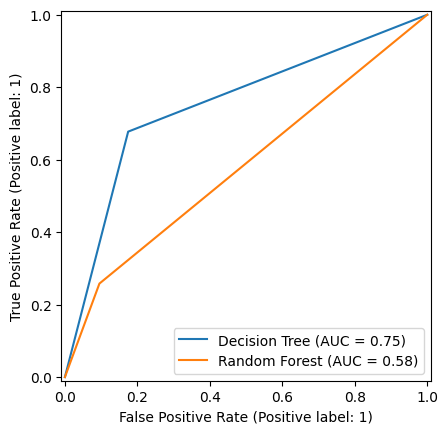

In [391]:
curva_roc = RocCurveDisplay.from_predictions(y_val, prediccion_arbol, name = 'Decision Tree')
curva_roc = RocCurveDisplay.from_predictions(y_val, prediccion_rf, name = 'Random Forest', ax = curva_roc.ax_)

Ahora solo falta usar el método roc_auc_score para calcular el AUC de los dos modelos:

In [392]:
print(f'AUC (Decision Tree): {roc_auc_score(y_val, prediccion_arbol)}')
print(f'AUC (Random Forest): {roc_auc_score(y_val, prediccion_rf)}')

AUC (Decision Tree): 0.7514080901177674
AUC (Random Forest): 0.5814132104454686


3 - Para obtener el gráfico de la curva de precisión x recall y la métrica AP, primero importaremos las funciones para generar el gráfico y calcular la métrica:

In [393]:
from sklearn.metrics import PrecisionRecallDisplay, average_precision_score

Para presentar los resultados de la curva de precisión x recall en el mismo gráfico, podemos almacenar el gráfico en una variable y utilizar el parámetro ax para usar el gráfico ya existente como base:

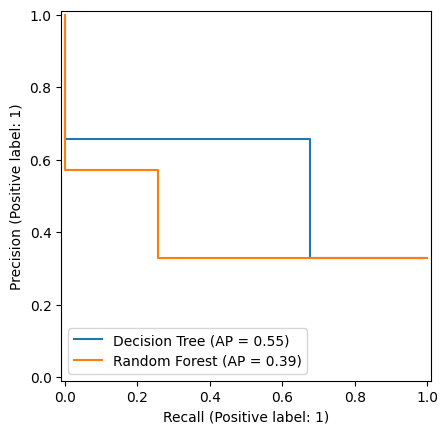

In [394]:
curva_precision_recall = PrecisionRecallDisplay.from_predictions(y_val, prediccion_arbol, name = 'Decision Tree')
curva_precision_recall = PrecisionRecallDisplay.from_predictions(y_val, prediccion_rf, name = 'Random Forest', ax = curva_precision_recall.ax_)

Ahora solo falta usar el método average_precision_score para calcular el AP de los dos modelos:

In [395]:
print(f'AP (Decision Tree): {average_precision_score(y_val, prediccion_arbol)}')
print(f'AP (Random Forest): {average_precision_score(y_val, prediccion_rf)}')

AP (Decision Tree): 0.5509394303363074
AP (Random Forest): 0.3921462888518482


4 - Para generar el informe de métricas, primero necesitamos importar la función classification_report:

In [396]:
from sklearn.metrics import classification_report

A partir de ahí, podemos generar los informes para cada uno de los modelos, utilizando los valores reales y previstos:

In [397]:
print('Decision Tree')
print(classification_report(y_val, prediccion_arbol))
print('Random Forest')
print(classification_report(y_val, prediccion_rf))

Decision Tree
              precision    recall  f1-score   support

           0       0.84      0.83      0.83        63
           1       0.66      0.68      0.67        31

    accuracy                           0.78        94
   macro avg       0.75      0.75      0.75        94
weighted avg       0.78      0.78      0.78        94

Random Forest
              precision    recall  f1-score   support

           0       0.71      0.90      0.80        63
           1       0.57      0.26      0.36        31

    accuracy                           0.69        94
   macro avg       0.64      0.58      0.58        94
weighted avg       0.67      0.69      0.65        94



**1 -** En el proceso de validación cruzada, se generan diferentes modelos para cada división realizada en los datos y, en consecuencia, diferentes valores de métricas de evaluación. Para encontrar un resultado promedio de las métricas, se puede construir un intervalo de confianza a partir de la media y la desviación estándar de las métricas. Crea una función para calcular el intervalo de confianza de los resultados de una validación cruzada con 2 desviaciones estándar. La función necesita 2 parámetros: uno para recibir una lista con los resultados de las métricas de la validación cruzada y otro para recibir el nombre del algoritmo. Para generar el intervalo de confianza, extrae la media de los resultados de la lista y la desviación estándar. El intervalo de confianza debe ser presentado en un print con el valor mínimo siendo la media restada de 2 desviaciones estándar y el valor máximo siendo la media sumada de 2 desviaciones estándar. Ejemplo de retorno de la función:

**Intervalo de confianza ("nombre del modelo"): ["valor mínimo del intervalo", "valor máximo del intervalo"]**

**2 -** KFold es la estrategia más simple de validación cruzada, que permite la división aleatoria de los datos en k partes, siendo utilizada una parte para validación y el resto para entrenamiento del modelo. El proceso de creación de modelos se repite hasta que todas las partes son utilizadas como validación. Sabiendo esto, evalúa el desempeño de los modelos con un intervalo de confianza utilizando la validación cruzada con el método KFold, usando 10 partes, con el uso del parámetro n_splits y mezclando los datos antes de la separación con el parámetro shuffle. Usa el método cross_val_score que no retorna el tiempo de ejecución, solo las métricas.

**3 -** En el proceso de división de datos con el KFold aleatorio, puede ser que la proporción de cada categoría de la variable objetivo no se mantenga en cada una de las partes de los datos. Para mantener esa proporción en cada una de las partes, podemos utilizar el KFold estratificado, haciendo que el proceso de validación de datos sea mucho más consistente. Evalúa el desempeño de los modelos con un intervalo de confianza utilizando la validación cruzada (cross_val_score) con el método StratifiedKFold, usando el parámetro n_splits y mezclando los datos antes de la separación con el parámetro shuffle y evaluando la métrica F1-Score usando el parámetro scoring.

**4 -** En conjuntos de datos con pocos registros (pocas filas), las estrategias de separación de los datos para validación pueden hacer que quede poca información en los datos de entrenamiento, haciendo que el modelo no comprenda bien el patrón de los datos. El LeaveOneOut es una estrategia para sortear este problema, utilizando solo un registro como dato de validación. Evalúa el desempeño de los modelos utilizando la validación cruzada (cross_val_score) con el método LeaveOneOut.

El método LeaveOneOut generará un modelo para cada una de las filas de la base de datos, por lo tanto, la lista de resultados tendrá tasa de acierto solo de 0 o 1 para cada modelo. De esta forma, extrae solo la media del resultado con el método mean(), sin utilizar el intervalo de confianza.

**Solución para los desafíos**

**1 -** Para calcular el intervalo de confianza de los resultados de la validación cruzada, necesitamos la lista de resultados y también el nombre del modelo para presentarlo en la función print. Vamos a crear una función llamada intervalo_conf que recibe dos parámetros: resultados y nombre_modelo.

A partir de los resultados, podemos extraer la media y la desviación estándar y generar el intervalo de confianza que está a una distancia de dos desviaciones estándar por debajo y por encima de esa media:

In [398]:
def intervalo_conf(resultados, nombre_modelo):
    media = resultados.mean()
    desvio_estandar = resultados.std()
    print(f'Intervalo de confianza ({nombre_modelo}): [{media - 2*desvio_estandar}, {min(media + 2*desvio_estandar, 1)}]')

**2 -** El primer paso a realizar es importar la función cross_val_score y el método KFold:

In [399]:
from sklearn.model_selection import cross_val_score, KFold

Hecho esto, vamos a inicializar los modelos y utilizar el KFold con n_splits=10 para generar una división de 10 partes. Además, utilizaremos el parámetro shuffle=True para barajar los datos antes de realizar la separación.

Posteriormente, vamos a usar el método cross_val_score para realizar el procedimiento de validación cruzada con los dos modelos y generar el intervalo de confianza a partir de los resultados:

In [400]:
arbol = DecisionTreeClassifier(max_depth = 3)
random_forest = RandomForestClassifier(max_depth = 2)

kf = KFold(n_splits = 10, shuffle = True, random_state = 5)

resultado_arbol = cross_val_score(arbol, X, y, cv = kf)
resultado_rf = cross_val_score(random_forest, X, y, cv = kf)

intervalo_conf(resultado_arbol, 'Decision Tree')
intervalo_conf(resultado_rf, 'Random Forest')

Intervalo de confianza (Decision Tree): [0.5337181765177326, 0.8684155361422958]
Intervalo de confianza (Random Forest): [0.6005424881288313, 0.7838102856976268]


**3 -** El primer paso a realizar es importar la función cross_val_score y el método StratifiedKFold:

In [401]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

El paso sigue de forma muy parecida al desafío anterior, diferenciándose en la elección del método de validación que será estratificado, con el método StratifiedKFold. Además, la métrica de evaluación necesita ser alterada a f1, a partir del parámetro scoring de la función cross_val_score:

In [402]:
arbol = DecisionTreeClassifier(max_depth = 3)
random_forest = RandomForestClassifier(max_depth = 2)

skf = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 5)

resultado_arbol = cross_val_score(arbol, X, y, cv = skf, scoring = 'f1')
resultado_rf = cross_val_score(random_forest, X, y, cv = skf, scoring =  'f1')

intervalo_conf(resultado_arbol, 'Decision Tree')
intervalo_conf(resultado_rf, 'Random Forest')

Intervalo de confianza (Decision Tree): [0.271659875902482, 0.7462406274736961]
Intervalo de confianza (Random Forest): [0.17394900049572604, 0.5728603758864057]


**4 -** El primer paso a realizar es importar la función cross_val_score y el método LeaveOneOut:

In [403]:
from sklearn.model_selection import cross_val_score, LeaveOneOut

La construcción del código se da de forma muy parecida a los desafíos anteriores. Primero, los modelos son inicializados y luego se inicializa el método LeaveOneOut, sin la necesidad de definir parámetros, ya que recorre toda la base de datos hasta que todos los valores han sido elegidos como datos de validación y el resto como datos de entrenamiento.

Aquí vamos a calcular solo la media de los resultados, por lo tanto, utilizaremos el método mean() en cada una de las listas de resultados para obtener la precisión media.

In [404]:
arbol = DecisionTreeClassifier(max_depth = 3)
random_forest = RandomForestClassifier(max_depth = 2)

loo = LeaveOneOut()

resultado_arbol = cross_val_score(arbol, X, y, cv = loo)
resultado_rf = cross_val_score(random_forest, X, y, cv = loo)

print(f'Precisión media (Decision Tree): {resultado_arbol.mean()}')
print(f'Precisión media (Random Forest):{resultado_rf.mean()}')

Precisión media (Decision Tree): 0.7085561497326203
Precisión media (Random Forest):0.6925133689839572


**BALANCEO DE DATOS, usando oversample y undersample**

1 - El desbalanceo de los datos de la variable objetivo puede hacer que el modelo se incline a acertar los patrones de solo la categoría que tiene mayor cantidad, haciendo necesario en algunos casos un tratamiento específico de balanceo de datos. La etapa inicial es identificar si existe o no el desbalanceo de datos en la variable objetivo. Por eso, verifica la proporción de datos de la variable objetivo del conjunto de datos de diabetes. Este análisis puede hacerse a partir del porcentaje de datos, utilizando el método value_counts(normalize=True) o con la utilización de un gráfico de conteo, usando el gráfico countplot de la biblioteca seaborn para entender si hay un desbalanceo de datos.

2 - Al realizar el balanceo de datos en una validación cruzada, es necesario utilizar un pipeline, para que los datos de validación no sean balanceados, manteniéndose en el estándar de los datos del mundo real. Utiliza un pipeline que contenga el ajuste del modelo y el balanceo de los datos usando el oversampling con SMOTE, obteniendo la media del F1-Score de una validación cruzada con StratifiedKFold.

3 - Además del oversampling, es posible utilizar la estrategia de undersampling para hacer el balanceo de los datos. A pesar de ser estrategias distintas, ambas requieren de un pipeline por tratarse de balanceo de datos en una validación cruzada. Utiliza un pipeline que contenga el ajuste del modelo y el balanceo de los datos usando el undersampling con NearMiss en su versión 3, obteniendo la media del F1-Score de una validación cruzada con StratifiedKFold.

4 - Después de realizar diversas análisis y mejorar el rendimiento de los modelos, llega la etapa final, que consiste en seleccionar el modelo con mejor rendimiento y hacer la evaluación final en un conjunto de datos de prueba, que no ha sido visto durante el proceso de entrenamiento y validación. Elige el modelo que obtuvo el mejor rendimiento al comparar las estrategias de oversampling y undersampling y entrena un modelo usando todos los datos con la mejor estrategia. Realiza la evaluación del modelo usando los datos de prueba que fueron separados al inicio de los desafíos, obteniendo el informe de métricas y matriz de confusión.

**Solución para los desafíos**

**1 -** Para chequear la proporción de los datos en la variable objetivo, podemos usar el método value_counts que realiza el conteo de los datos de cada categoría de la columna. También podemos usar el parámetro normalize = True para devolver el resultado en porcentaje:

In [405]:
datos['diabetes'].value_counts(normalize = True)

,proportion
diabetes,
0,0.670051
1,0.329949


In [407]:
datos['diabetes'].value_counts()

,count
diabetes,
0,264
1,130


Otra forma de analizar es a través de un gráfico. Podemos usar el countplot() de la biblioteca seaborn:

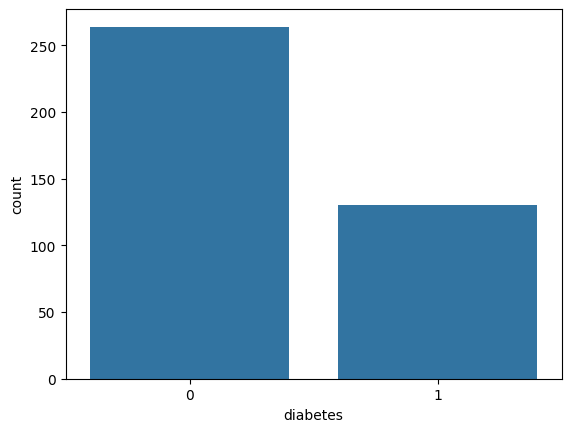

In [406]:
import seaborn as sns

sns.countplot(datos, x = 'diabetes');

**2 -** El primer paso es importar el método Pipeline y el SMOTE para balancear los datos:

In [408]:
from imblearn.pipeline import Pipeline as imbpipeline
from imblearn.over_sampling import SMOTE

Hecho esto, podemos inicializar el modelo, crear el pipeline con las tareas de oversampling y del modelo, y realizar la validación cruzada con el StratifiedKfold, obteniendo la media de la métrica F1-Score:

In [409]:
arbol = DecisionTreeClassifier(max_depth = 3)
pipeline = imbpipeline([('oversample', SMOTE()), ('arbol', arbol)])
skf = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 5)
resultado_arbol = cross_val_score(pipeline, X, y, cv = skf, scoring = 'f1')
print(f'F1 (Decision Tree):{resultado_arbol.mean()}')

F1 (Decision Tree):0.5629599013162749


In [410]:
random_forest = RandomForestClassifier(max_depth = 2)
pipeline = imbpipeline([('oversample', SMOTE()), ('random_forest', random_forest)])
skf = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 5)
resultado_rf = cross_val_score(pipeline, X, y, cv = skf, scoring = 'f1')
print(f'F1 (Random Forest):{resultado_rf.mean()}')

F1 (Random Forest):0.6099663482703118


**3 -** El primer paso es importar el método Pipeline y el NearMiss para balancear los datos:

In [411]:
from imblearn.pipeline import Pipeline as imbpipeline
from imblearn.under_sampling import NearMiss

Hecho esto, podemos inicializar el modelo, crear el pipeline con las tareas de undersampling y del modelo, y realizar la validación cruzada con el StratifiedKfold, obteniendo la media de la métrica F1-Score:

In [412]:
arbol = DecisionTreeClassifier(max_depth = 3)
pipeline = imbpipeline([('undersample', NearMiss(version = 3)), ('arbol', arbol)])
skf = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 5)
resultado_arbol = cross_val_score(pipeline, X, y, cv = skf, scoring = 'f1')
print(f'F1 (Decision Tree):{resultado_arbol.mean()}')

F1 (Decision Tree):0.5449681473471796


In [413]:
random_forest = RandomForestClassifier(max_depth = 2)
pipeline = imbpipeline([('undersample', NearMiss(version = 3)), ('random_forest', random_forest)])
skf = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 5)
resultado_rf = cross_val_score(pipeline, X, y, cv = skf, scoring = 'f1')
print(f'F1 (Random Forest):{resultado_rf.mean()}')

F1 (Random Forest):0.610808814841073


4 - El modelo que obtuvo mayor rendimiento en las pruebas del desafío fue el RandomForest, usando el max_depth = 2 en la estrategia de undersampling. Por lo tanto, vamos a balancear los datos y utilizar este modelo en todos los datos balanceados. Por último, vamos a validar el modelo en datos de prueba, no vistos hasta ahora:

              precision    recall  f1-score   support

           0       0.89      0.62      0.73        13
           1       0.55      0.86      0.67         7

    accuracy                           0.70        20
   macro avg       0.72      0.74      0.70        20
weighted avg       0.77      0.70      0.71        20



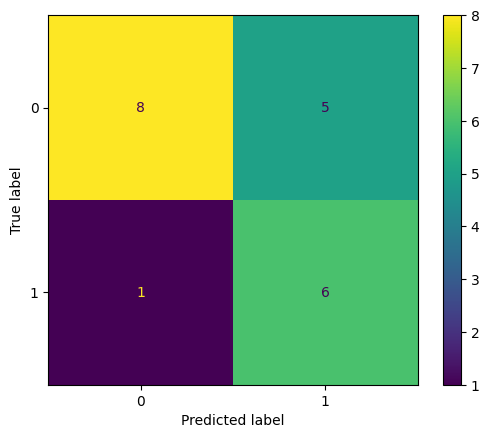

In [414]:
undersample = NearMiss(version = 3)
x_balanceado, y_balanceado = undersample.fit_resample(X, y)

modelo = RandomForestClassifier(max_depth = 2)
modelo.fit(x_balanceado, y_balanceado)
y_previsto = modelo.predict(X_test)

print(classification_report(y_test, y_previsto))
ConfusionMatrixDisplay.from_predictions(y_test, y_previsto);

**En esta clase, aprendiste a:**

Utilizar oversampling y undersampling en datos desbalanceados;

Utilizar técnicas de balanceo de datos y entender sus ventajas y desventajas;

Aplicar un pipeline junto con la validación cruzada;

Probar modelos de clasificación.